In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys

project_dir = os.sep.join([os.getcwd(), '..'])
sys.path.append(os.sep.join([project_dir, 'src', 'data']))
import bysykkel_data


%matplotlib inline

In [3]:
max_trip_duration = 7200
data_dir = os.sep.join([project_dir, 'data', 'raw'])

In [4]:
df = bysykkel_data.read_trip_data(data_dir)

In [5]:
df = bysykkel_data.augment_trip_data(df)
len(df.index)

6991532

In [6]:
df.head(8)

,Start station,Start time,End station,End time,DurationSeconds
0,283.0,2016-10-01 04:00:08,238.0,2016-10-01 04:09:47,579.0
1,169.0,2016-10-01 04:00:41,175.0,2016-10-01 04:11:07,626.0
2,211.0,2016-10-01 04:01:02,162.0,2016-10-01 04:15:52,890.0
3,200.0,2016-10-01 04:01:20,163.0,2016-10-01 04:15:04,824.0
4,157.0,2016-10-01 04:02:16,163.0,2016-10-01 04:04:29,133.0
5,177.0,2016-10-01 04:04:22,179.0,2016-10-01 04:24:40,1218.0
6,257.0,2016-10-01 04:04:39,199.0,2016-10-01 04:16:09,690.0
7,191.0,2016-10-01 04:05:54,191.0,2016-10-01 04:06:21,27.0


In [7]:
df = bysykkel_data.remove_invalid_trips(df, max_trip_duration)
len(df.index)

6899134

In [8]:
df.DurationSeconds.describe([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])

count    6.899134e+06
mean     7.613309e+02
std      8.256302e+02
min      0.000000e+00
1%       2.800000e+01
5%       1.320000e+02
25%      3.250000e+02
50%      5.220000e+02
75%      8.600000e+02
95%      2.257000e+03
99%      4.769000e+03
max      7.199000e+03
Name: DurationSeconds, dtype: float64

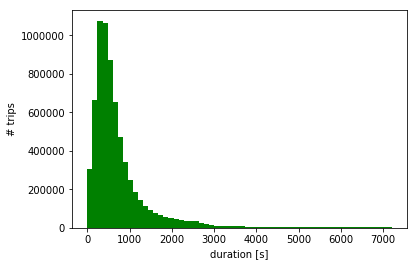

In [10]:
_ = plt.hist(df['DurationSeconds'], bins=range(0, max_trip_duration+1, 120), color='g')
_ = plt.xlabel('duration [s]')
_ = plt.ylabel('# trips')
plt.savefig('tripduration_hist.svg')

In [ ]:
# plot trips per month

In [ ]:
print('Done.')